In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 100

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# แปลงชนิดข้อมูลเป็น float32 เพื่อให้รองรับค่าทศนิยม
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# ทำ Scaling โดยการหารด้วย 255
x_train /= 255.0
x_test /= 255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

In [6]:
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_val shape {x_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (40000, 32, 32, 3)
y_train shape (40000, 10)
x_val shape (10000, 32, 32, 3)
y_val shape (10000, 10)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 10)


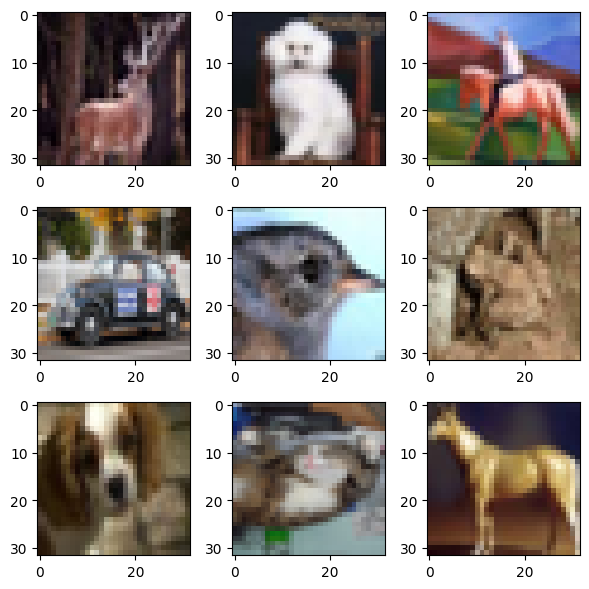

In [7]:
# กำหนดขนาดรูปภาพ
plt.figure(figsize=(6, 6))

for i in range(9):
    # สร้าง subplot ในตารางขนาด 3x3 ตำแหน่งที่ i+1
    plt.subplot(3, 3, i + 1)

    # แสดงรูปภาพ
    plt.imshow(x_train[i])

plt.tight_layout() # จัด layout ให้สวยงามอัตโนมัติ
plt.show()

In [8]:
input_shape=(32, 32, 3)
inputs = Input(shape=input_shape)

# Feature Extraction Layers
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Classification Layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

# กำหนด Output Layer
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# ประกาศว่าโมเดลนี้มีจุดเริ่มต้น (inputs) และจุดสิ้นสุด (outputs)
model = models.Model(inputs=inputs, outputs=outputs)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
EPOCHS = 20

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val, y_val))

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1737 - loss: 7.0425 - val_accuracy: 0.2729 - val_loss: 1.9753
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3036 - loss: 1.9019 - val_accuracy: 0.3825 - val_loss: 1.7356
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4017 - loss: 1.6555 - val_accuracy: 0.4628 - val_loss: 1.4831
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4775 - loss: 1.4255 - val_accuracy: 0.5212 - val_loss: 1.3164
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5364 - loss: 1.2715 - val_accuracy: 0.5523 - val_loss: 1.2511
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5802 - loss: 1.1702 - val_accuracy: 0.5454 - val_loss: 1.2966
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6062 - loss: 1.0953 - val_accuracy: 0.5613 - val_loss: 1.2490
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6289 - loss: 1.0370 - val_accuracy: 0.

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้างช่วงของจำนวน epochs (เริ่มจาก 1)
epochs_range = range(1, len(acc) + 1)

# สร้าง Subplots 1 แถว 2 คอลัมน์
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Training and Validation Loss',
                                    'Training and Validation Accuracy'))

# กราฟที่ 1 Training & Validation Loss
# เพิ่มเส้น Training Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=loss,
                         mode='lines', name='Training Loss'), row=1, col=1)
# เพิ่มเส้น Validation Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_loss,
                         mode='lines', name='Validation Loss'), row=1, col=1)

# กราฟที่ 2 Training & Validation Accuracy
# เพิ่มเส้น Training Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=acc,
                         mode='lines', name='Training Accuracy'), row=1, col=2)

# เพิ่มเส้น Validation Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_acc,
                         mode='lines', name='Validation Accuracy'), row=1, col=2)

# ปรับปรุง Layout และตั้งชื่อแกน
fig.update_layout(title_text='Model Training History', height=400, width=1000)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.show()

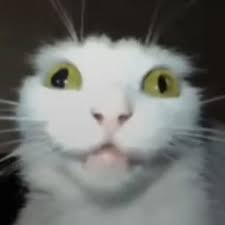

In [12]:
cat = load_img('images.jpeg')
cat

In [13]:
img_array = img_to_array(cat)
img_array.shape

(225, 225, 3)

In [14]:
# เพิ่มมิติของ Batch (จาก (H, W, C) -> (1, H, W, C))
img_batch = tf.expand_dims(img_array, 0)
img_batch.shape

TensorShape([1, 225, 225, 3])

In [15]:
# height_factor=0.2 เลื่อนขึ้น/ลงได้ไม่เกิน 20% ของความสูงภาพ
vertical_shift_layer = tf.keras.layers.RandomTranslation(
    height_factor=0.2,
    width_factor=0.0, # ไม่มีการเลื่อนในแนวนอน
    fill_mode='reflect'
)

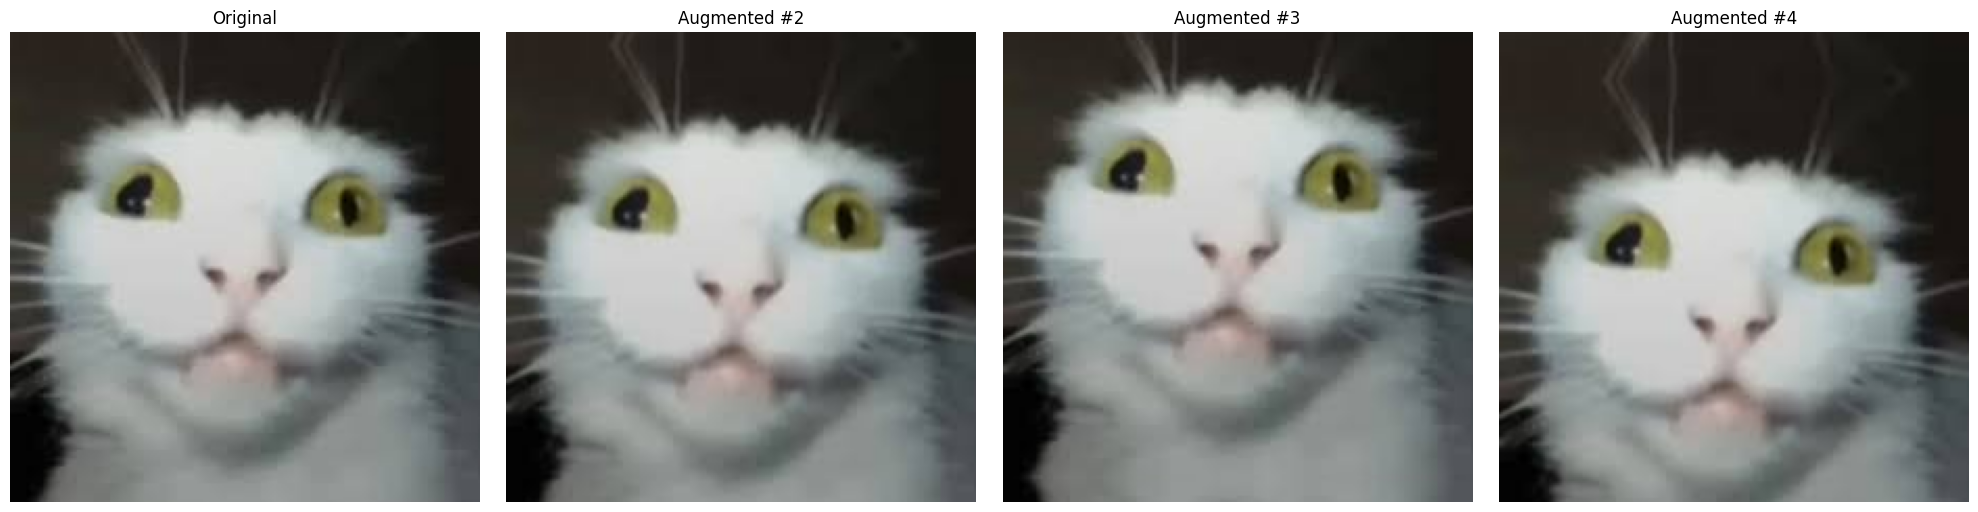

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

# แสดงภาพที่ผ่าน Augmentation 3 ครั้ง
for i in range(1, 4):
    # ส่งภาพ (ที่เป็น Batch) ผ่าน Layer ที่เราสร้างไว้
    augmented_batch = vertical_shift_layer(img_batch)

    # แปลง Tensor กลับเป็นภาพที่แสดงผลได้ (Numpy array ชนิด uint8)
    # และเลือกภาพแรกจาก Batch (index [0])
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Augmented #{i+1}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
horizontal_shift_layer = tf.keras.layers.RandomTranslation(
    height_factor=0.0, # ไม่มีการเลื่อนในแนวตั้ง
    width_factor=0.2,
    fill_mode='reflect'
)

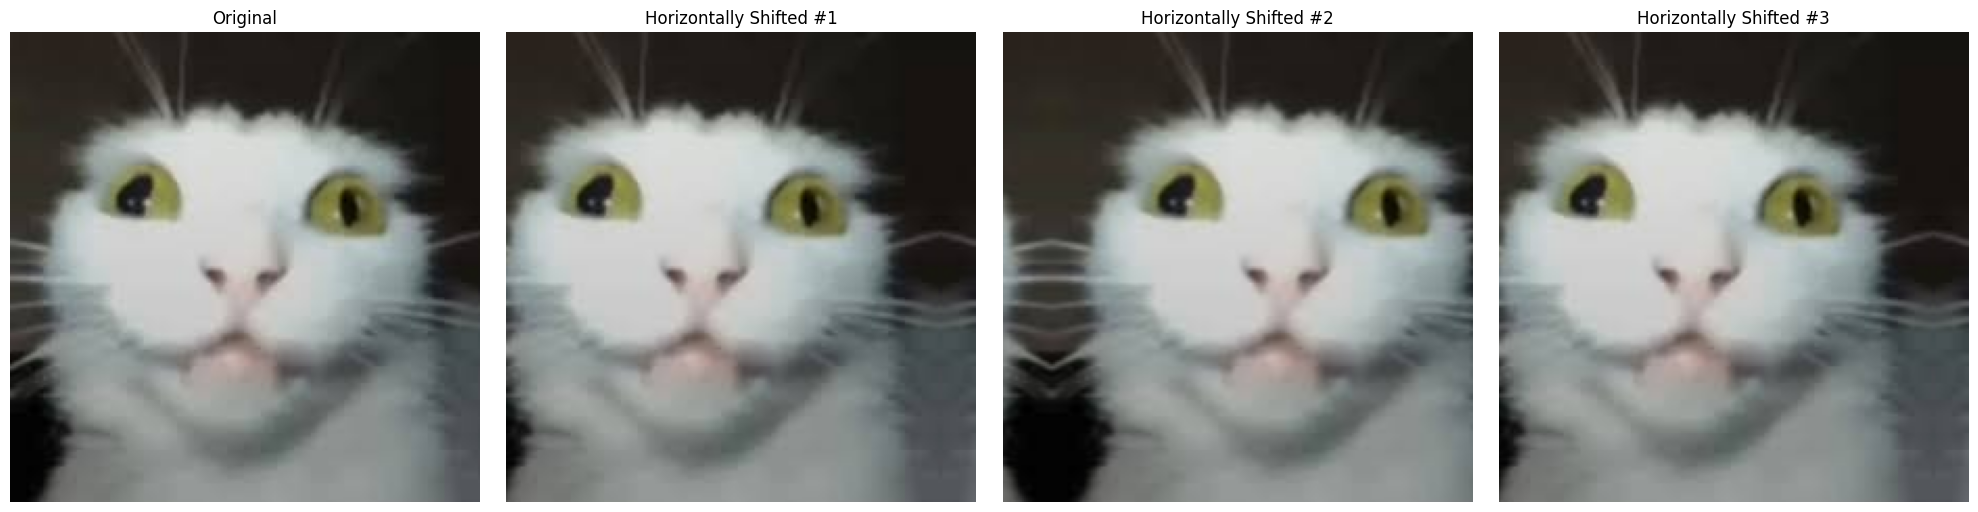

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = horizontal_shift_layer(img_batch)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Horizontally Shifted #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

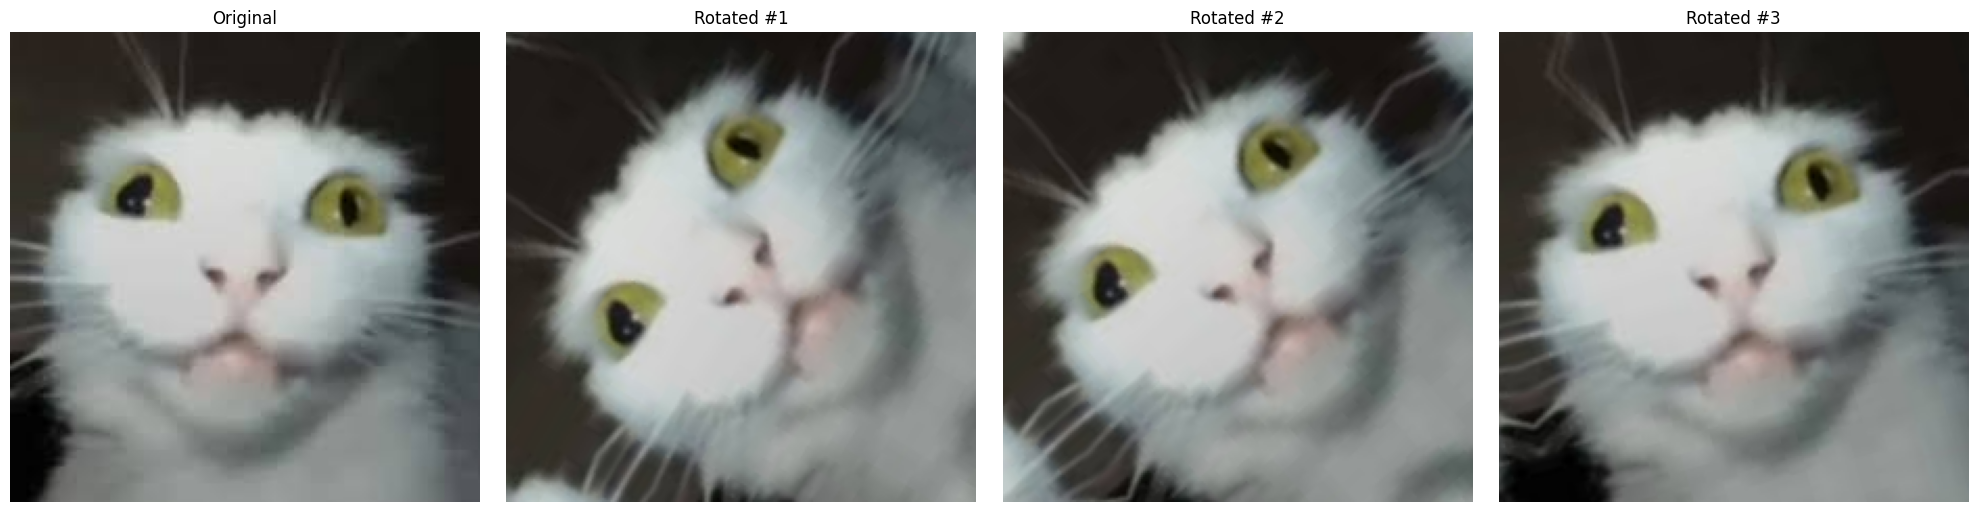

In [19]:
rotation_layer = tf.keras.layers.RandomRotation(
    factor=0.2,  # Randomly rotate by a factor of up to 20% of 360 degrees (72 degrees)
    fill_mode='reflect'
)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = rotation_layer(img_batch)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Rotated #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

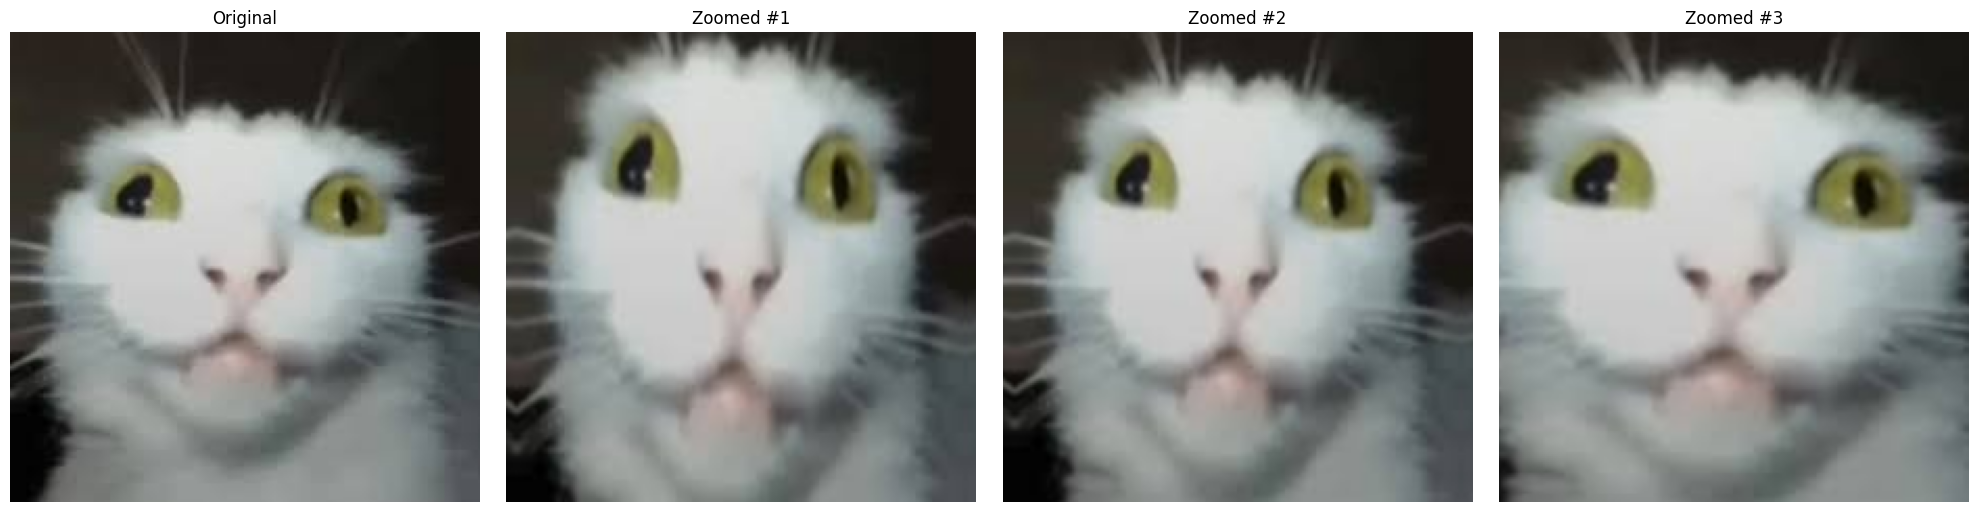

In [20]:
zoom_layer = tf.keras.layers.RandomZoom(
    height_factor=0.3, # Randomly zoom in/out by up to 30% vertically
    width_factor=0.3,  # Randomly zoom in/out by up to 30% horizontally
    fill_mode='reflect'
)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = zoom_layer(img_batch)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Zoomed #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

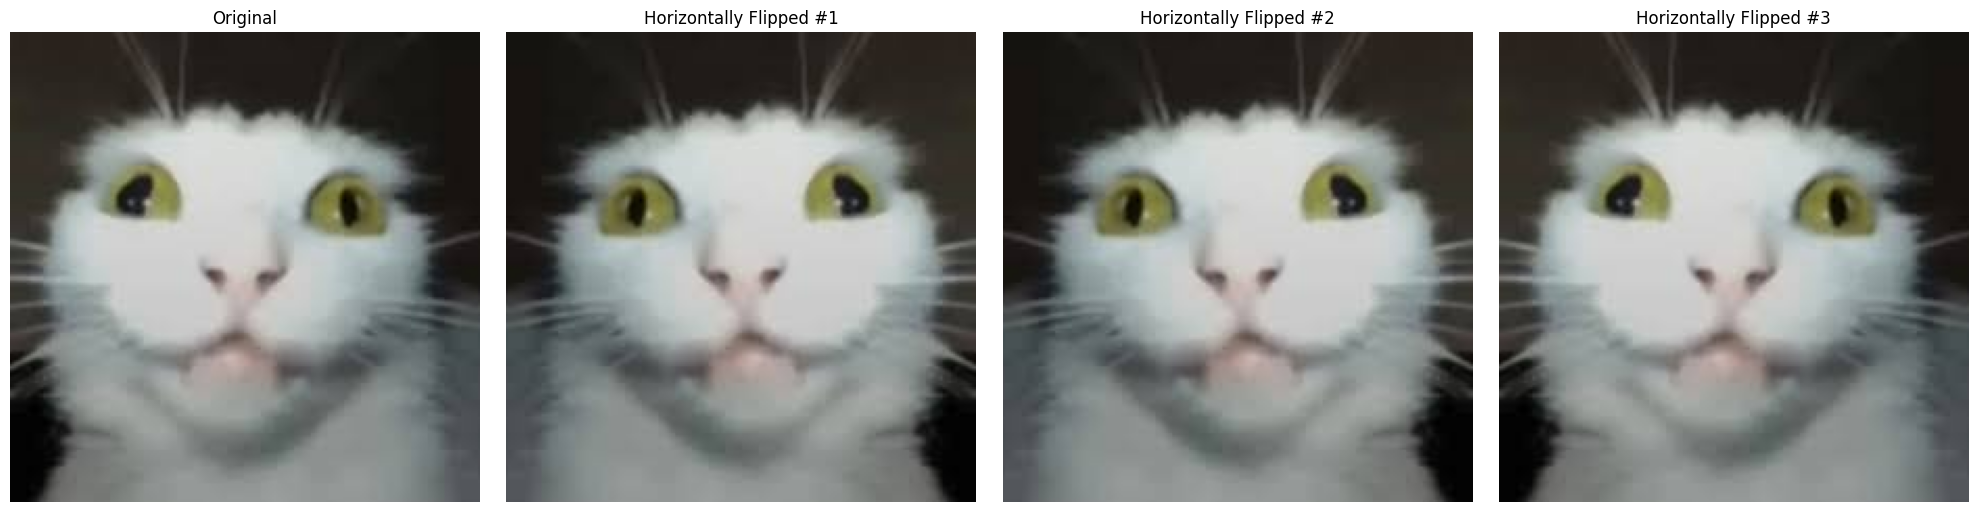

In [21]:

horizontal_flip_layer = tf.keras.layers.RandomFlip(
    mode='horizontal'  # Randomly flip images horizontally
)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = horizontal_flip_layer(img_batch)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Horizontally Flipped #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

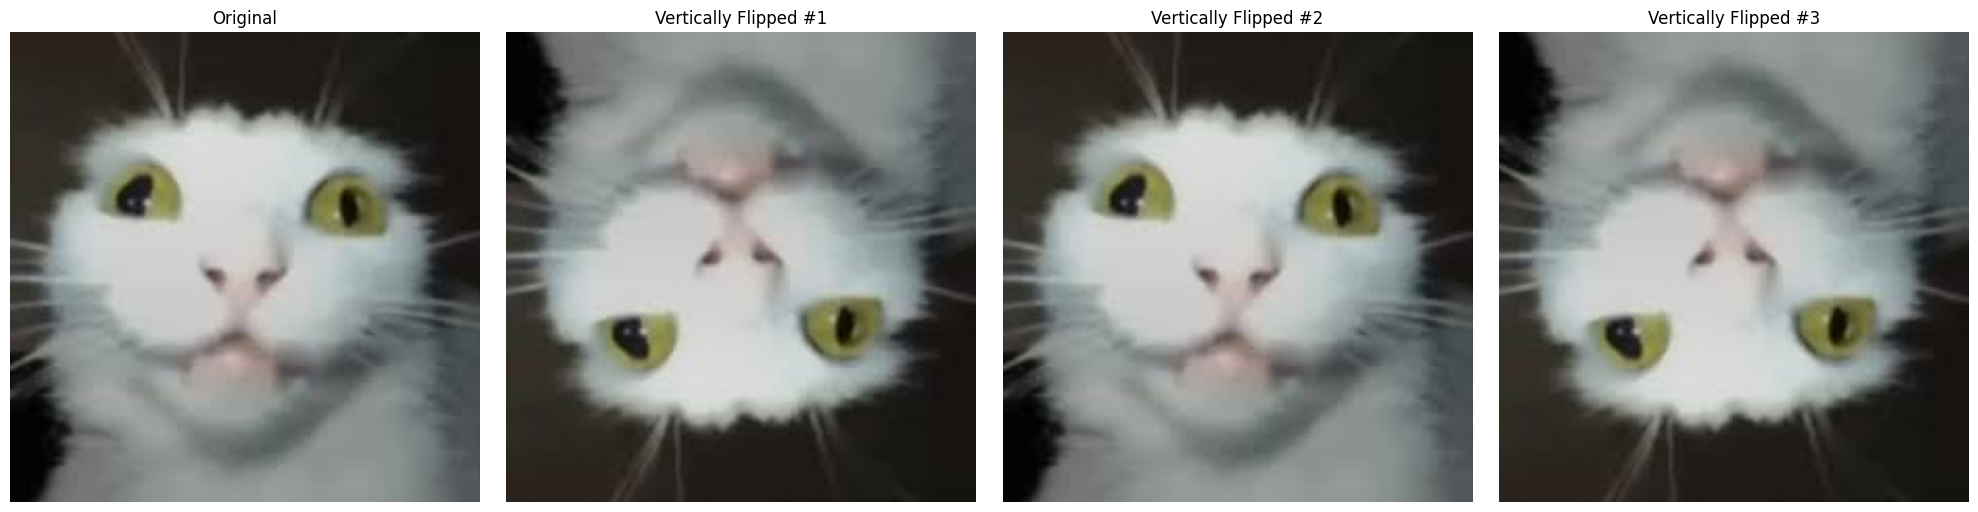

In [22]:
vertical_flip_layer = tf.keras.layers.RandomFlip(
    mode='vertical'  # Randomly flip images vertically
)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = vertical_flip_layer(img_batch)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()

    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Vertically Flipped #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

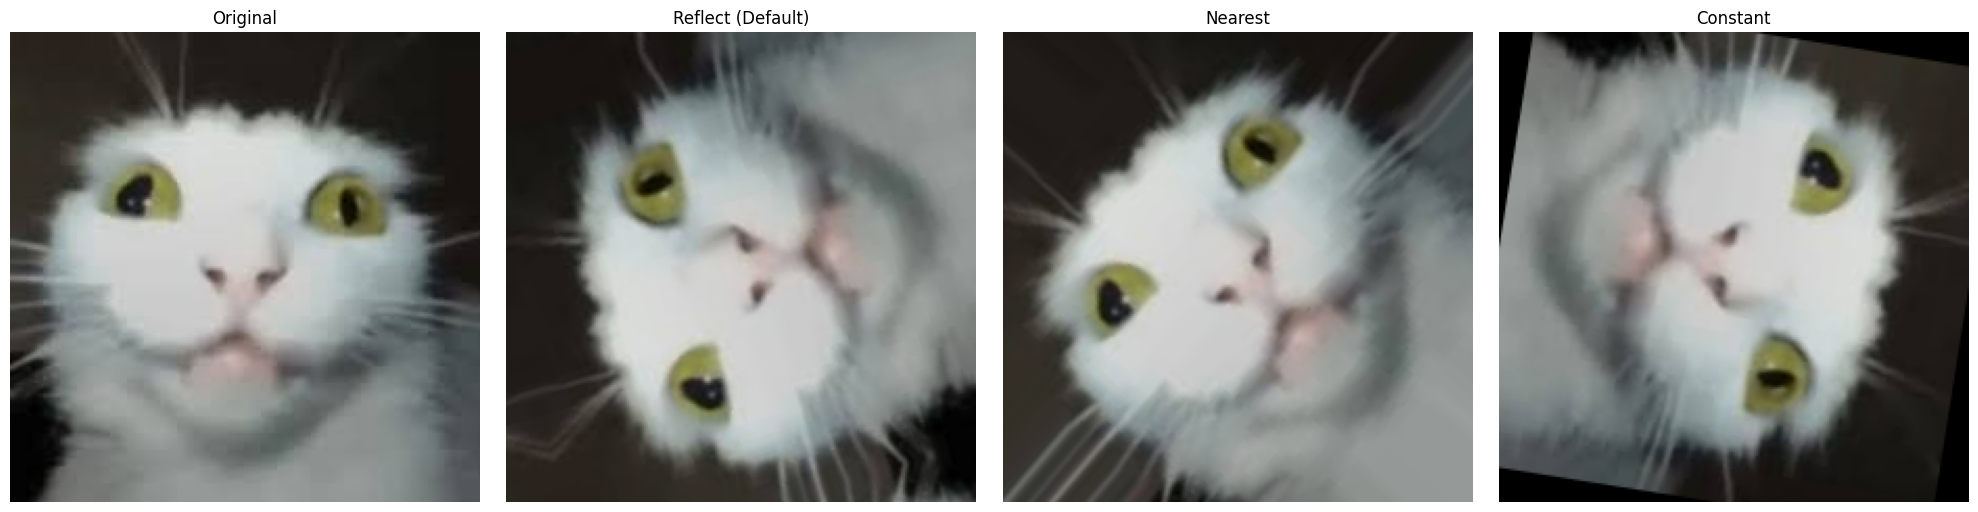

In [23]:
# reflect ค่า Default ของ API
reflect_layer = tf.keras.layers.RandomRotation(factor=0.4, fill_mode='reflect')

nearest_layer = tf.keras.layers.RandomRotation(factor=0.4, fill_mode='nearest')

# 'constant' (เติมด้วยค่าคงที่ ในที่นี้คือสีดำ)
constant_layer = tf.keras.layers.RandomRotation(factor=0.4, fill_mode='constant')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# แสดงภาพต้นฉบับ
ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

# แสดงภาพที่เติมขอบแบบต่างๆ
titles = ['Reflect (Default)', 'Nearest', 'Constant']
layers = [reflect_layer, nearest_layer, constant_layer]

for i in range(3):
    augmented_batch = layers[i](img_batch, training=True) # training=True เพื่อให้เกิดการสุ่ม
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()
    ax[i+1].imshow(augmented_image)
    ax[i+1].set_title(titles[i])
    ax[i+1].axis('off')

plt.tight_layout()
plt.show()

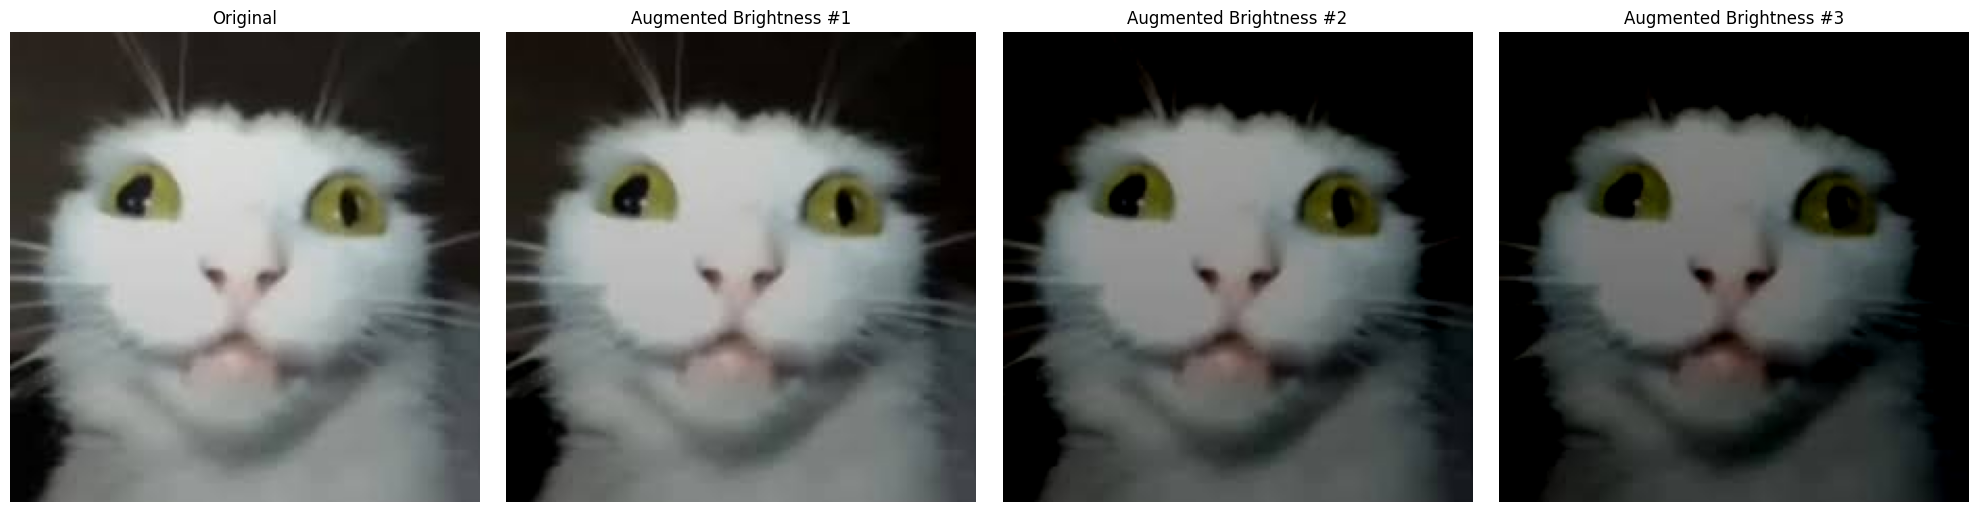

In [24]:
# Layer สำหรับ Random Brightness
brightness_layer = tf.keras.layers.RandomBrightness(factor=0.4)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = brightness_layer(img_batch, training=True)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()
    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Augmented Brightness #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

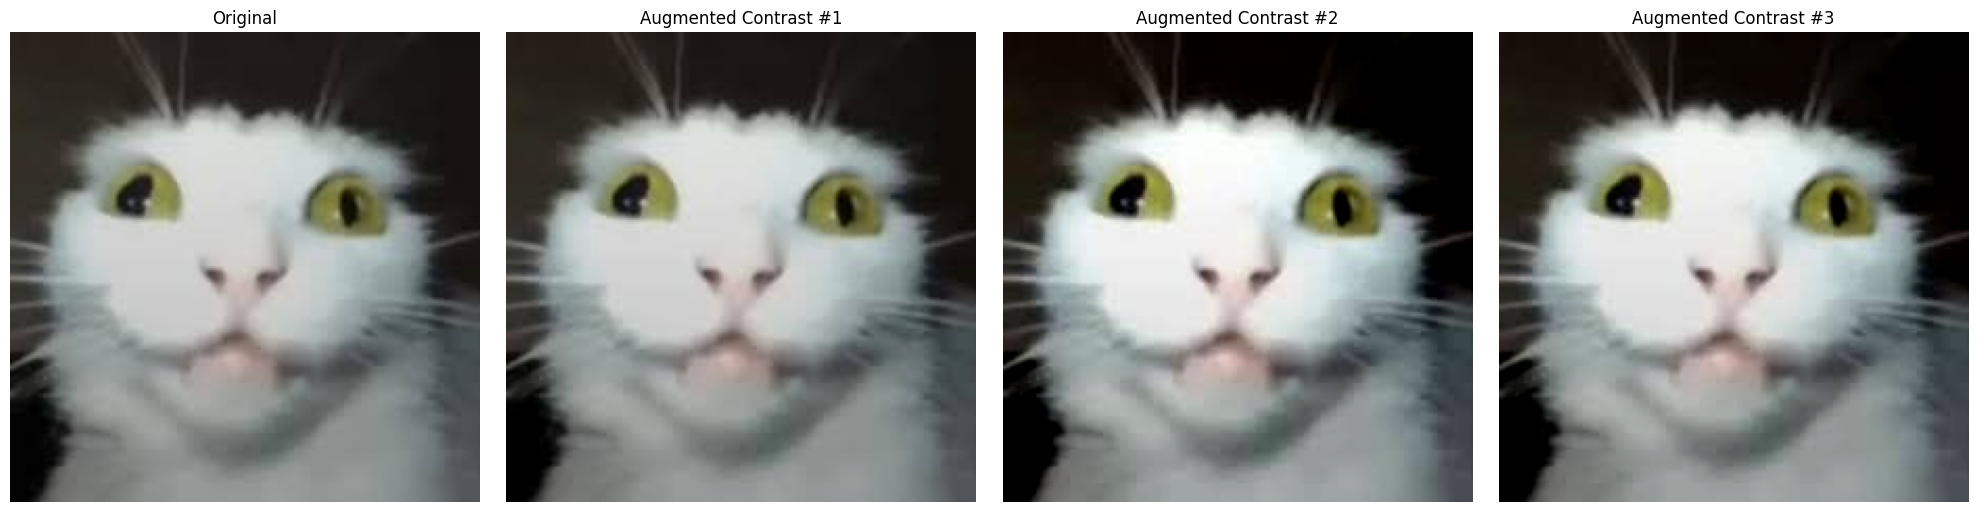

In [25]:
# สร้าง Layer สำหรับ Random Contrast
contrast_layer = tf.keras.layers.RandomContrast(factor=0.4)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = contrast_layer(img_batch, training=True)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()
    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Augmented Contrast #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

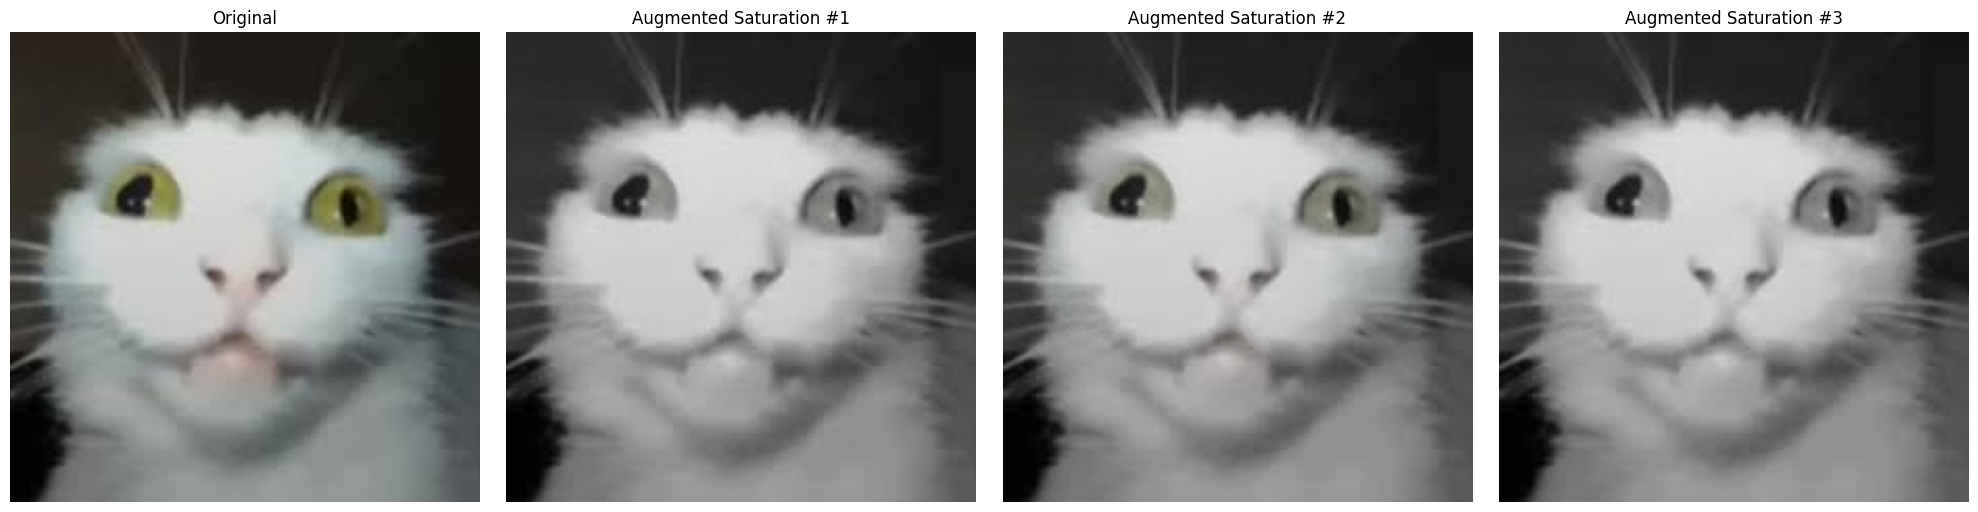

In [26]:
# สร้าง Layer สำหรับ Random Saturation
saturation_layer = tf.keras.layers.RandomSaturation(factor=0.3)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = saturation_layer(img_batch, training=True)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()
    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Augmented Saturation #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

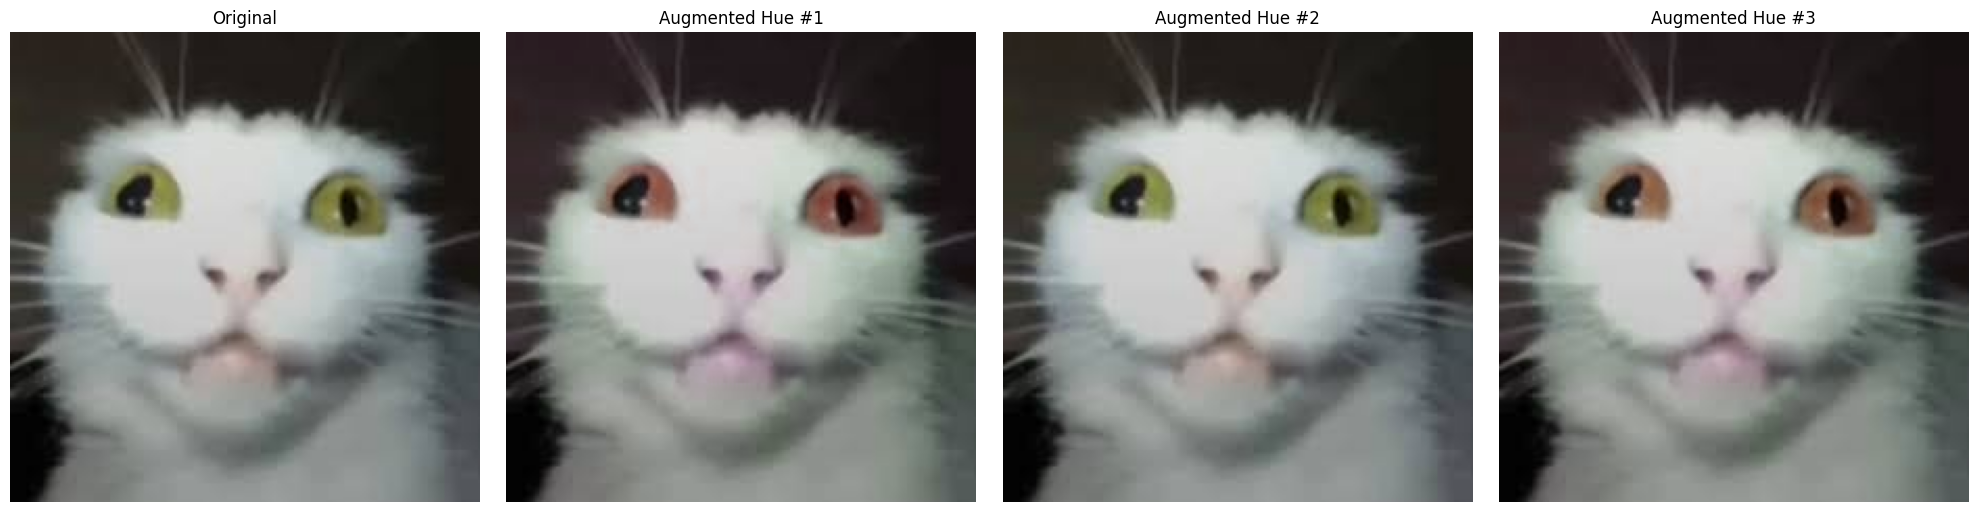

In [27]:
# สร้าง Layer สำหรับ Random Hue
hue_layer = tf.keras.layers.RandomHue(factor=0.3)

# --- Plot ผลลัพธ์ ---
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

for i in range(1, 4):
    augmented_batch = hue_layer(img_batch, training=True)
    augmented_image = tf.cast(augmented_batch[0], dtype=tf.uint8).numpy()
    ax[i].imshow(augmented_image)
    ax[i].set_title(f'Augmented Hue #{i}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [28]:
input_shape=(32, 32, 3)
inputs = Input(shape=input_shape)

data_augmentation = models.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

# นำ Input ไปผ่าน Augmentation Layers ก่อน
x = data_augmentation(inputs)

# Feature Extraction Layers
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# Classification Layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# กำหนด Output Layer
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

# ประกาศว่าโมเดลนี้มีจุดเริ่มต้น (inputs) และจุดสิ้นสุด (outputs)
model = models.Model(inputs=inputs, outputs=outputs)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
EPOCHS = 120

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val, y_val))

Epoch 1/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2369 - loss: 4.9605 - val_accuracy: 0.4181 - val_loss: 1.6448
Epoch 2/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4246 - loss: 1.6066 - val_accuracy: 0.4875 - val_loss: 1.4353
Epoch 3/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4718 - loss: 1.4788 - val_accuracy: 0.5074 - val_loss: 1.4220
Epoch 4/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4996 - loss: 1.4065 - val_accuracy: 0.5451 - val_loss: 1.2732
Epoch 5/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5120 - loss: 1.3677 - val_accuracy: 0.5517 - val_loss: 1.2890
Epoch 6/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5338 - loss: 1.3074 - val_accuracy: 0.5680 - val_loss: 1.2349
Epoch 7/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5490 - loss: 1.2755 - val_accuracy: 0.5487 - val_loss: 1.3146
Epoch 8/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5554 - loss: 1.2559 - val_acc

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้างช่วงของจำนวน epochs (เริ่มจาก 1)
epochs_range = range(1, len(acc) + 1)

# สร้าง Subplots 1 แถว 2 คอลัมน์
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Training and Validation Loss',
                                    'Training and Validation Accuracy'))

# กราฟที่ 1 Training & Validation Loss
# เพิ่มเส้น Training Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=loss,
                         mode='lines', name='Training Loss'), row=1, col=1)
# เพิ่มเส้น Validation Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_loss,
                         mode='lines', name='Validation Loss'), row=1, col=1)

# กราฟที่ 2 Training & Validation Accuracy
# เพิ่มเส้น Training Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=acc,
                         mode='lines', name='Training Accuracy'), row=1, col=2)

# เพิ่มเส้น Validation Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_acc,
                         mode='lines', name='Validation Accuracy'), row=1, col=2)

# ปรับปรุง Layout และตั้งชื่อแกน
fig.update_layout(title_text='Model Training History', height=400, width=1000)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.show()

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy = {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.7133 - loss: 0.9543

Test accuracy = 0.7132999897003174


In [33]:
input_shape = (32, 32, 3)

data_augmentation = models.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

inputs = Input(shape=input_shape)
x = data_augmentation(inputs)

# Feature Extraction Layers
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# Classification Layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# ตำแหน่งที่เพิ่ม Dropout
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
EPOCHS = 120

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val, y_val))

Epoch 1/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1048 - loss: 5.9180 - val_accuracy: 0.1092 - val_loss: 2.2974
Epoch 2/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1167 - loss: 2.2870 - val_accuracy: 0.1873 - val_loss: 2.1799
Epoch 3/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1602 - loss: 2.2059 - val_accuracy: 0.1778 - val_loss: 2.0966
Epoch 4/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1613 - loss: 2.1382 - val_accuracy: 0.1893 - val_loss: 2.0305
Epoch 5/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1647 - loss: 2.1071 - val_accuracy: 0.1949 - val_loss: 1.9901
Epoch 6/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1717 - loss: 2.0958 - val_accuracy: 0.2383 - val_loss: 1.8776
Epoch 7/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2009 - loss: 2.0094 - val_accuracy: 0.2428 - val_loss: 1.8949
Epoch 8/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2243 - loss: 1.9740 - val_accu

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้างช่วงของจำนวน epochs (เริ่มจาก 1)
epochs_range = range(1, len(acc) + 1)

# สร้าง Subplots 1 แถว 2 คอลัมน์
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Training and Validation Loss',
                                    'Training and Validation Accuracy'))

# กราฟที่ 1 Training & Validation Loss
# เพิ่มเส้น Training Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=loss,
                         mode='lines', name='Training Loss'), row=1, col=1)
# เพิ่มเส้น Validation Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_loss,
                         mode='lines', name='Validation Loss'), row=1, col=1)

# กราฟที่ 2 Training & Validation Accuracy
# เพิ่มเส้น Training Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=acc,
                         mode='lines', name='Training Accuracy'), row=1, col=2)

# เพิ่มเส้น Validation Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_acc,
                         mode='lines', name='Validation Accuracy'), row=1, col=2)

# ปรับปรุง Layout และตั้งชื่อแกน
fig.update_layout(title_text='Model Training History', height=400, width=1000)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.show()

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy = {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.6681 - loss: 1.0420

Test accuracy = 0.6680999994277954


In [39]:
input_shape = (32, 32, 3)

data_augmentation = models.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

inputs = Input(shape=input_shape)
x = data_augmentation(inputs)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=outputs)

In [40]:
# สร้าง Loss Function object พร้อมกำหนดค่า Label Smoothing
loss_function = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
EPOCHS = 120

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val, y_val))

Epoch 1/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 2/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0993 - loss: 2.3030 - val_accuracy: 0.0958 - val_loss: 2.3028
Epoch 3/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1014 - loss: 2.3026 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 4/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0979 - val_loss: 2.3027
Epoch 5/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 6/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1030 - loss: 2.3026 - val_accuracy: 0.0978 - val_loss: 2.3027
Epoch 7/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0969 - loss: 2.3026 - val_accuracy: 0.0958 - val_loss: 2.3027
Epoch 8/120
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0964 - loss: 2.3027 - val_accu

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# สร้างช่วงของจำนวน epochs (เริ่มจาก 1)
epochs_range = range(1, len(acc) + 1)

# สร้าง Subplots 1 แถว 2 คอลัมน์
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Training and Validation Loss',
                                    'Training and Validation Accuracy'))

# กราฟที่ 1 Training & Validation Loss
# เพิ่มเส้น Training Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=loss,
                         mode='lines', name='Training Loss'), row=1, col=1)
# เพิ่มเส้น Validation Loss
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_loss,
                         mode='lines', name='Validation Loss'), row=1, col=1)

# กราฟที่ 2 Training & Validation Accuracy
# เพิ่มเส้น Training Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=acc,
                         mode='lines', name='Training Accuracy'), row=1, col=2)

# เพิ่มเส้น Validation Accuracy
fig.add_trace(go.Scatter(x=list(epochs_range), y=val_acc,
                         mode='lines', name='Validation Accuracy'), row=1, col=2)

# ปรับปรุง Layout และตั้งชื่อแกน
fig.update_layout(title_text='Model Training History', height=400, width=1000)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.show()

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy = {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.1000 - loss: 2.3026

Test accuracy = 0.10000000149011612
